<a href="https://colab.research.google.com/github/sharmila2704/ML/blob/main/Phonepay_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name -** PhonePe Pulse Insights


# **Project type -** EDA

# **Project Summary -**
With the rapid adoption of digital payments in India, platforms like PhonePe have become integral to everyday financial transactions. This project focuses on exploring, analyzing, and visualizing digital transaction data made publicly available by PhonePe Pulse, with a specific emphasis on state-wise user activity, transaction patterns, and insurance growth.

The project follows a complete data analytics pipeline:

Data Extraction: Cloned PhonePe Pulse data (in JSON format) from GitHub.

Data Transformation: Converted JSON files into structured CSV format for various metrics such as transactions, users, and insurance.

Data Loading: Imported cleaned datasets into a SQLite database to enable efficient querying and analysis.

Exploratory Data Analysis (EDA): Conducted detailed analysis using SQL, Pandas, and Plotly to identify:

Top-performing states and districts

Quarterly trends in transaction and insurance growth

Correlation between transaction amount and insurance adoption

An interactive dashboard was developed using Streamlit, allowing real-time visualization and drill-down into state-wise insights, growth patterns, and category-wise transaction behavior.

# **Github link -**

# **Problem Statement -**
With the increasing reliance on digital payment systems like PhonePe, understanding the dynamics of transactions, user engagement, and insurance-related data is crucial for improving services and targeting users effectively. This project aims to analyze and visualize aggregated values of payment categories, create maps for total values at state and district levels, and identify top-performing states, districts, and pin codes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
base_path = "/content/drive/MyDrive/phonepe_analysis_project"
dirs = [
    "data/phonepe_data",
    "sql",
    "notebooks",
    "dashboard",
    "reports/charts"
]
for d in dirs:
    os.makedirs(os.path.join(base_path, d), exist_ok=True)
open(os.path.join(base_path, "requirements.txt"), "a").close()
open(os.path.join(base_path, "README.md"), "a").close()
print("Persistent project folder structure created in Google Drive.")


Persistent project folder structure created in Google Drive.


In [ ]:
import shutil
src_path = "/content/pulse/data"
dst_path = "/content/drive/MyDrive/phonepe_analysis_project/data/phonepe_data"
shutil.copytree(src_path, dst_path, dirs_exist_ok=True)
print("Data copied to Google Drive project folder.")


Data copied to Google Drive project folder.


In [ ]:
import os
import json
import sqlite3
from tqdm import tqdm

In [ ]:
import os

target_path = None
for root, dirs, files in os.walk('pulse'):
    if root.endswith('country/india/state'):
        target_path = root
        break

print("Found path:", target_path)


Found path: None


In [ ]:
import os
import json
import pandas as pd

# Base path to cloned repo
base_path = 'pulse/data/aggregated/transaction/country/india/state/'

# Output directory
output_dir = 'extracted_csvs'
os.makedirs(output_dir, exist_ok=True)

data = []

# Loop through states and years
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for quarter_file in os.listdir(year_path):
            file_path = os.path.join(year_path, quarter_file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                for item in content['data']['transactionData']:
                    data.append({
                        'state': state,
                        'year': int(year),
                        'quarter': int(quarter_file.strip('.json')),
                        'transaction_type': item['name'],
                        'transaction_count': item['paymentInstruments'][0]['count'],
                        'transaction_amount': item['paymentInstruments'][0]['amount']
                    })

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv(os.path.join(output_dir, 'aggregated_transaction.csv'), index=False)


In [ ]:
# clone the Github repo
!git clone https://github.com/PhonePe/pulse.git


Cloning into 'pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.
Updating files: 100% (9029/9029), done.


In [ ]:
import os
import json
import pandas as pd

user_data = []
user_path = 'pulse/data/aggregated/user/country/india/state/'

for state in os.listdir(user_path):
    state_path = os.path.join(user_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            quarter = int(file.strip('.json'))
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                users = content.get('data', {}).get('usersByDevice', [])
                if users:  # Check if users is not None and not empty
                    for user in users:
                        user_data.append({
                            'state': state,
                            'year': int(year),
                            'quarter': quarter,
                            'device_brand': user.get('brand'),
                            'user_count': user.get('count'),
                            'percentage': user.get('percentage')
                        })

# Save the CSV
os.makedirs("extracted_csvs", exist_ok=True)
df_user = pd.DataFrame(user_data)
df_user.to_csv("extracted_csvs/aggregated_user.csv", index=False)

print("✅ extracted_csvs/aggregated_user.csv created.")

✅ extracted_csvs/aggregated_user.csv created.


In [ ]:
#Extracting json to csv
def extract_json_to_csv(base_path, data_type, output_csv):
    import os
    import json
    rows = []

    for state in os.listdir(base_path):
        state_path = os.path.join(base_path, state)
        if not os.path.isdir(state_path):  # ✅ Skip if not a directory
            continue

        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            if not os.path.isdir(year_path):  # ✅ Skip if not a directory
                continue

            for file in os.listdir(year_path):
                if not file.endswith(".json"):
                    continue

                quarter = file.replace(".json", "")
                file_path = os.path.join(year_path, file)

                try:
                    with open(file_path, 'r') as f:
                        data = json.load(f)

                    if data_type == 'transaction':
                        for item in data['data']['transactionData']:
                            rows.append({
                                'state': state,
                                'year': int(year),
                                'quarter': int(quarter[-1]),
                                'transaction_type': item['name'],
                                'transaction_count': item['paymentInstruments'][0]['count'],
                                'transaction_amount': item['paymentInstruments'][0]['amount']
                            })

                    elif data_type == 'user':
                        users = data['data']['aggregated']['registeredUsers']
                        opens = data['data']['aggregated']['appOpens']
                        rows.append({
                            'state': state,
                            'year': int(year),
                            'quarter': int(quarter[-1]),
                            'registered_users': users,
                            'app_opens': opens
                        })

                    elif data_type == 'insurance':
                        for item in data['data']['transactionData']:
                            rows.append({
                                'state': state,
                                'year': int(year),
                                'quarter': int(quarter[-1]),
                                'insurance_type': item['name'],
                                'transaction_count': item['paymentInstruments'][0]['count'],
                                'transaction_amount': item['paymentInstruments'][0]['amount']
                            })

                except Exception as e:
                    print(f"❌ Error reading {file_path}: {e}")
                    continue

    df = pd.DataFrame(rows)
    df.to_csv(output_csv, index=False)
    print(f"✅ Data saved to {output_csv}")


In [ ]:
import os
import json
import pandas as pd

map_txn_data = []
map_txn_path = 'pulse/data/map/transaction/hover/country/india/state/'

for state in os.listdir(map_txn_path):
    state_path = os.path.join(map_txn_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            quarter = int(file.strip('.json'))
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                hover_data = content.get('data', {}).get('hoverDataList', [])
                for district in hover_data:
                    metric = district.get('metric', [])[0] if district.get('metric') else {}
                    map_txn_data.append({
                        'state': state,
                        'year': int(year),
                        'quarter': quarter,
                        'district': district.get('name'),
                        'transaction_count': metric.get('count'),
                        'transaction_amount': metric.get('amount')
                    })

# Create DataFrame and save
df_map_txn = pd.DataFrame(map_txn_data)
os.makedirs("extracted_csvs", exist_ok=True)
df_map_txn.to_csv("extracted_csvs/map_transaction.csv", index=False)

print("✅ extracted_csvs/map_transaction.csv created.")


✅ extracted_csvs/map_transaction.csv created.


In [ ]:
import os
import json
import pandas as pd

insurance_data = []
path = 'pulse/data/aggregated/insurance/country/india/state/'

for state in os.listdir(path):
    state_path = os.path.join(path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            quarter = int(file.strip('.json'))
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                data = content.get('data', {})
                metric = data.get('metric', {})

                insurance_count = metric.get('count', 0)
                insurance_amount = metric.get('amount', 0.0)

                # DEBUG CHECK
                if insurance_count == 0:
                    print(f"[Missing count] {state}/{year}/{file}")

                insurance_data.append({
                    'state': state,
                    'year': int(year),
                    'quarter': quarter,
                    'insurance_count': insurance_count,
                    'insurance_amount': insurance_amount
                })

df_insurance = pd.DataFrame(insurance_data)
os.makedirs("extracted_csvs", exist_ok=True)
df_insurance.to_csv("extracted_csvs/aggregated_insurance.csv", index=False)

print("✅ Extracted insurance data with debug info.")


[Missing count] rajasthan/2020/4.json
[Missing count] rajasthan/2020/2.json
[Missing count] rajasthan/2020/3.json
[Missing count] rajasthan/2022/1.json
[Missing count] rajasthan/2022/4.json
[Missing count] rajasthan/2022/2.json
[Missing count] rajasthan/2022/3.json
[Missing count] rajasthan/2024/1.json
[Missing count] rajasthan/2024/4.json
[Missing count] rajasthan/2024/2.json
[Missing count] rajasthan/2024/3.json
[Missing count] rajasthan/2023/1.json
[Missing count] rajasthan/2023/4.json
[Missing count] rajasthan/2023/2.json
[Missing count] rajasthan/2023/3.json
[Missing count] rajasthan/2021/1.json
[Missing count] rajasthan/2021/4.json
[Missing count] rajasthan/2021/2.json
[Missing count] rajasthan/2021/3.json
[Missing count] bihar/2020/4.json
[Missing count] bihar/2020/2.json
[Missing count] bihar/2020/3.json
[Missing count] bihar/2022/1.json
[Missing count] bihar/2022/4.json
[Missing count] bihar/2022/2.json
[Missing count] bihar/2022/3.json
[Missing count] bihar/2024/1.json
[Missi

In [ ]:
#Paths of datasets
txn_path = "/content/pulse/data/aggregated/transaction/country/india"
user_path = "/content/pulse/data/aggregated/user/country/india"
insurance_path = "/content/pulse/data/aggregated/insurance/country/india"


In [ ]:
# Extracting datasets
extract_json_to_csv(txn_path, "transaction", "aggregated_transactions.csv")
extract_json_to_csv(user_path, "user", "aggregated_users.csv")
extract_json_to_csv(insurance_path, "insurance", "aggregated_insurance.csv")


✅ Data saved to aggregated_transactions.csv
✅ Data saved to aggregated_users.csv
✅ Data saved to aggregated_insurance.csv


In [ ]:
import sqlite3
import pandas as pd

In [ ]:
# Connect to SQLite DB
conn = sqlite3.connect("phonepe_data.db")
cursor = conn.cursor()

In [ ]:
# 1. aggregated_transaction table
cursor.execute("""
CREATE TABLE IF NOT EXISTS aggregated_transaction (
    state TEXT,
    year INTEGER,
    quarter INTEGER,
    transaction_type TEXT,
    transaction_count INTEGER,
    transaction_amount REAL
)
""")

In [ ]:
# 2. aggregated_user table
cursor.execute("""
CREATE TABLE IF NOT EXISTS aggregated_user (
    state TEXT,
    year INTEGER,
    quarter INTEGER,
    device_brand TEXT,
    user_count INTEGER,
    percentage REAL
)
""")

In [ ]:
# 3. map_transaction table
cursor.execute("""
CREATE TABLE IF NOT EXISTS map_transaction (
    state TEXT,
    year INTEGER,
    quarter INTEGER,
    district TEXT,
    transaction_count INTEGER,
    transaction_amount REAL
)
""")

In [ ]:
# Load and insert into aggregated_transaction
df_txn = pd.read_csv("extracted_csvs/aggregated_transaction.csv")
df_txn.to_sql("aggregated_transaction", conn, if_exists="append", index=False)

5034

In [ ]:
# Load and insert into aggregated_user
df_user = pd.read_csv("extracted_csvs/aggregated_user.csv")
df_user.to_sql("aggregated_user", conn, if_exists="append", index=False)

6732

In [ ]:
# Load and insert into aggregated_user
df_user = pd.read_csv("extracted_csvs/aggregated_user.csv")
df_user.to_sql("aggregated_user", conn, if_exists="append", index=False)

6732

In [ ]:
import sqlite3
import pandas as pd
#  Open connection
conn = sqlite3.connect("phonepe_data.db")
# Load the DataFrame
df_map_txn = pd.read_csv("extracted_csvs/map_transaction.csv")
# ✅ Insert into SQL table
df_map_txn.to_sql("map_transaction", conn, if_exists="append", index=False)
# ✅ Commit and close AFTER insertion
conn.commit()
conn.close()


In [ ]:
import sqlite3
import pandas as pd

# Load the CSV
df_ins = pd.read_csv("extracted_csvs/aggregated_insurance.csv")

# Connect to your database
conn = sqlite3.connect("phonepe_data.db")

# Create table and insert data
df_ins.to_sql("aggregated_insurance", conn, if_exists="replace", index=False)

conn.commit()
conn.close()

print("✅ Insurance data loaded into SQLite as 'aggregated_insurance'")


✅ Insurance data loaded into SQLite as 'aggregated_insurance'


In [ ]:
conn = sqlite3.connect("phonepe_data.db")
df_check = pd.read_sql_query("""
SELECT state, SUM(transaction_amount) AS total_amount
FROM map_transaction
GROUP BY state
ORDER BY total_amount DESC
LIMIT 5
""", conn)

conn.close()
print(df_check)


            state  total_amount
0       telangana  1.666238e+14
1       karnataka  1.627149e+14
2     maharashtra  1.614968e+14
3  andhra-pradesh  1.386763e+14
4   uttar-pradesh  1.075408e+14


In [43]:
#1. Total Transaction Amount by State
import sqlite3
import pandas as pd
import plotly.express as px
import os

# Ensure path exists and connect to DB
db_dir = "/content/drive/MyDrive/phonepe_analysis_project"
db_path = os.path.join(db_dir, "phonepe_data.db")
conn = sqlite3.connect(db_path)

df = pd.read_sql_query("""
SELECT state, SUM(transaction_amount) AS total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
""", conn)
fig = px.bar(df, x="state", y="total_amount", title="Total Transaction Amount by State",
             labels={"total_amount": "INR"}, color="total_amount")
fig.show()
conn.close()

In [44]:
# 2. Quarterly Growth Over Time
import sqlite3
import pandas as pd
import plotly.express as px
import os

# Ensure path exists and connect to DB
db_dir = "/content/drive/MyDrive/phonepe_analysis_project"
db_path = os.path.join(db_dir, "phonepe_data.db")
conn = sqlite3.connect(db_path)


df_time = pd.read_sql_query("""
SELECT year, quarter, SUM(transaction_amount) AS total_amount
FROM aggregated_transaction
GROUP BY year, quarter
ORDER BY year, quarter
""", conn)

df_time['quarter_label'] = df_time['year'].astype(str) + '-Q' + df_time['quarter'].astype(str)

fig = px.line(df_time, x="quarter_label", y="total_amount",
              title="Transaction Volume Over Time", markers=True)
fig.show()
conn.close()

In [ ]:
import pandas as pd

df = pd.read_csv("extracted_csvs/aggregated_insurance.csv")
df.head()



,state,year,quarter,insurance_count,insurance_amount
0,rajasthan,2020,4,0,0.0
1,rajasthan,2020,2,0,0.0
2,rajasthan,2020,3,0,0.0
3,rajasthan,2022,1,0,0.0
4,rajasthan,2022,4,0,0.0


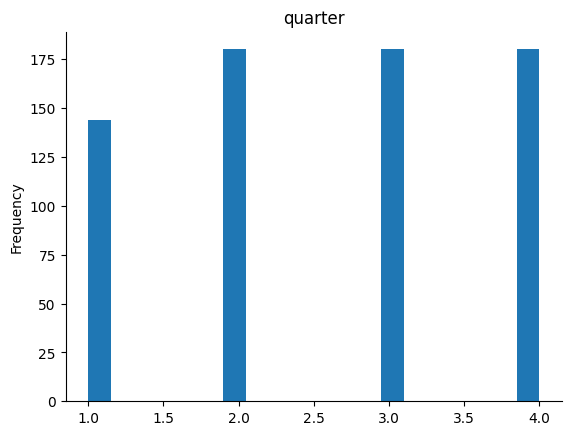

In [ ]:
# @title quarter

from matplotlib import pyplot as plt
df['quarter'].plot(kind='hist', bins=20, title='quarter')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd

df_ins = pd.read_csv("extracted_csvs/aggregated_insurance.csv")
print(df_ins.head(10))
print(df_ins.dtypes)
print(df_ins['insurance_amount'].unique())


       state  year  quarter  insurance_count  insurance_amount
0  rajasthan  2020        4                0               0.0
1  rajasthan  2020        2                0               0.0
2  rajasthan  2020        3                0               0.0
3  rajasthan  2022        1                0               0.0
4  rajasthan  2022        4                0               0.0
5  rajasthan  2022        2                0               0.0
6  rajasthan  2022        3                0               0.0
7  rajasthan  2024        1                0               0.0
8  rajasthan  2024        4                0               0.0
9  rajasthan  2024        2                0               0.0
state                object
year                  int64
quarter               int64
insurance_count       int64
insurance_amount    float64
dtype: object
[0.]


In [ ]:
import sqlite3
import pandas as pd
import plotly.express as px

conn = sqlite3.connect("phonepe_data.db")

df_ins_state = pd.read_sql_query("""
SELECT state, SUM(insurance_amount) AS total_amount
FROM aggregated_insurance
GROUP BY state
ORDER BY total_amount DESC
""", conn)

fig = px.bar(df_ins_state, x="state", y="total_amount",
             title="📊 Total Insurance Amount by State",
             labels={"total_amount": "Insurance Amount (INR)"},
             color="total_amount")
fig.show()
conn.close()


In [ ]:
conn = sqlite3.connect("phonepe_data.db")

df_ins_time = pd.read_sql_query("""
SELECT year, quarter, SUM(insurance_amount) AS total_amount
FROM aggregated_insurance
GROUP BY year, quarter
ORDER BY year, quarter
""", conn)

df_ins_time['quarter_label'] = df_ins_time['year'].astype(str) + "-Q" + df_ins_time['quarter'].astype(str)

fig = px.line(df_ins_time, x="quarter_label", y="total_amount",
              title="📈 Insurance Amount Over Time", markers=True)
fig.show()
conn.close()


In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("phonepe_data.db")

# Fetch total transaction and insurance amounts by state
query ="""
SELECT
    txn.state,
    SUM(txn.transaction_amount) AS total_transaction_amount,
    SUM(ins.insurance_amount) AS total_insurance_amount
FROM aggregated_transaction AS txn
JOIN aggregated_insurance AS ins
    ON txn.state = ins.state
    AND txn.year = ins.year
    AND txn.quarter = ins.quarter
GROUP BY txn.state
HAVING total_insurance_amount > 0
ORDER BY total_transaction_amount DESC;"""


df_corr = pd.read_sql_query(query, conn)
conn.close()

df_corr.head()


,state,total_transaction_amount,total_insurance_amount


In [ ]:
import plotly.express as px

fig = px.scatter(df_corr,
                 x="total_transaction_amount",
                 y="total_insurance_amount",
                 text="state",
                 trendline="ols",  # Add best-fit line
                 labels={
                     "total_transaction_amount": "Transaction Amount (INR)",
                     "total_insurance_amount": "Insurance Amount (INR)"
                 },
                 title="💡 Correlation Between Transaction & Insurance Amounts")

fig.update_traces(marker=dict(size=10, color="royalblue"), textposition='top center')
fig.show()


In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!ls /content/drive/MyDrive/


ls: cannot access '/content/drive/MyDrive/': No such file or directory


In [ ]:
!mkdir -p /content/drive/MyDrive/phonepe_analysis_project


In [ ]:
!ls /content/drive/MyDrive/phonepe_analysis_project


In [ ]:
import sqlite3
import os

# Ensure path exists
db_dir = "/content/drive/MyDrive/phonepe_analysis_project"
os.makedirs(db_dir, exist_ok=True)

# Define database path
db_path = os.path.join(db_dir, "phonepe_data.db")

# Connect to SQLite
conn = sqlite3.connect(db_path)
print("✅ Connected to SQLite database!")


✅ Connected to SQLite database!


In [ ]:
!git clone https://github.com/PhonePe/pulse.git /content/drive/MyDrive/phonepe_analysis_project/pulse


Cloning into '/content/drive/MyDrive/phonepe_analysis_project/pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 19.20 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.
Updating files: 100% (9029/9029), done.


In [ ]:
import os
import json
import pandas as pd

def extract_aggregated_transaction_json_to_csv(json_folder_path, output_csv_path):
    data = []
    for state in os.listdir(json_folder_path):
        state_path = os.path.join(json_folder_path, state)
        if os.path.isdir(state_path):
            for year in os.listdir(state_path):
                year_path = os.path.join(state_path, year)
                if os.path.isdir(year_path):
                    for quarter_file in os.listdir(year_path):
                        file_path = os.path.join(year_path, quarter_file)
                        if quarter_file.endswith(".json"):
                            with open(file_path, 'r') as f:
                                content = json.load(f)
                                if content['data']['transactionData']:
                                    for txn in content['data']['transactionData']:
                                        record = {
                                            'state': state,
                                            'year': int(year),
                                            'quarter': int(quarter_file.strip('.json')),
                                            'transaction_type': txn['name'],
                                            'transaction_count': txn['paymentInstruments'][0]['count'],
                                            'transaction_amount': txn['paymentInstruments'][0]['amount']
                                        }
                                        data.append(record)

    df = pd.DataFrame(data)
    df.to_csv(output_csv_path, index=False)
    print("✅ Extracted and saved to:", output_csv_path)

# Paths
json_path = "/content/drive/MyDrive/phonepe_analysis_project/pulse/data/aggregated/transaction/country/india"
output_csv = "/content/drive/MyDrive/phonepe_analysis_project/extracted_data/aggregated_transactions.csv"

# Ensure output folder exists
os.makedirs(os.path.dirname(output_csv), exist_ok=True)

# Extract
extract_aggregated_transaction_json_to_csv(json_path, output_csv)


✅ Extracted and saved to: /content/drive/MyDrive/phonepe_analysis_project/extracted_data/aggregated_transactions.csv


In [ ]:
!head /content/drive/MyDrive/phonepe_analysis_project/extracted_data/aggregated_transactions.csv


head: cannot open '/content/drive/MyDrive/phonepe_analysis_project/extracted_data/aggregated_transactions.csv' for reading: No such file or directory


In [2]:
import os
import json
import pandas as pd

def extract_aggregated_transaction_json_to_csv(json_folder_path, output_csv_path):
    data = []
    count = 0
    for state in os.listdir(json_folder_path):
        # Normalize state names to handle variations (e.g., spaces vs. hyphens)
        normalized_state = state.replace(' ', '-').lower()
        state_path = os.path.join(json_folder_path, state)
        if os.path.isdir(state_path):
            for year in os.listdir(state_path):
                year_path = os.path.join(state_path, year)
                if os.path.isdir(year_path):
                    for quarter_file in os.listdir(year_path):
                        file_path = os.path.join(year_path, quarter_file)
                        if quarter_file.endswith(".json"):
                            with open(file_path, 'r') as f:
                                content = json.load(f)
                                if content['data'] and content['data']['transactionData']:
                                    for txn in content['data']['transactionData']:
                                        record = {
                                            'state': normalized_state, # Use normalized state name
                                            'year': int(year),
                                            'quarter': int(quarter_file.strip('.json')),
                                            'transaction_type': txn['name'],
                                            'transaction_count': txn['paymentInstruments'][0]['count'],
                                            'transaction_amount': txn['paymentInstruments'][0]['amount']
                                        }
                                        data.append(record)
                                        count += 1
    print(f"✅ Extracted {count} records")

    if data:
        df = pd.DataFrame(data)
        df.to_csv(output_csv_path, index=False)
        print("✅ Saved to CSV:", output_csv_path)
    else:
        print("⚠️ No data found. CSV not created.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


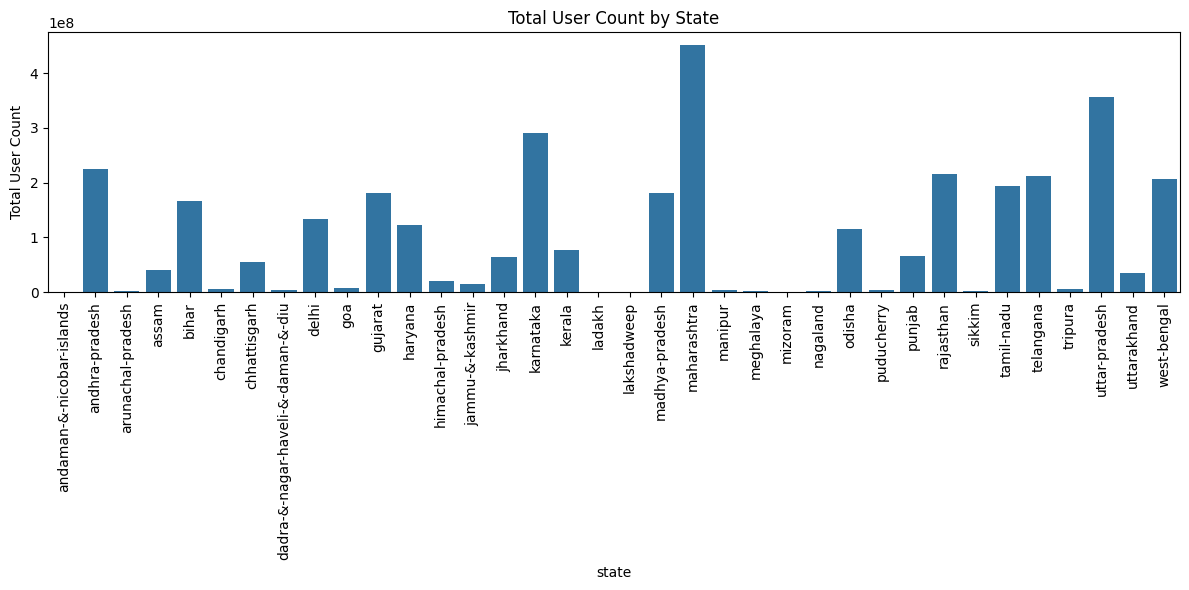

In [40]:
from google.colab import drive
drive.mount('/content/drive')
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure path exists
db_dir = "/content/drive/MyDrive/phonepe_analysis_project"
db_path = os.path.join(db_dir, "phonepe_data.db")

# Connect to SQLite DB
conn = sqlite3.connect(db_path)

# Read the aggregated_user table
df_user = pd.read_sql_query("SELECT * FROM aggregated_user", conn)

# Calculate total user count per state
engagement = df_user.groupby('state')['user_count'].sum().reset_index()

# Create a bar plot of total user count by state
plt.figure(figsize=(12, 6))
sns.barplot(data=engagement, x='state', y='user_count')
plt.xticks(rotation=90)
plt.title("Total User Count by State")
plt.ylabel("Total User Count")
plt.tight_layout()
plt.show()

conn.close() # Close the connection after use

In [50]:
# 1. aggregated_transaction table
cursor.execute("""
CREATE TABLE IF NOT EXISTS aggregated_transaction (
    state TEXT,
    year INTEGER,
    quarter INTEGER,
    transaction_type TEXT,
    transaction_count INTEGER,
    transaction_amount REAL
)
""")

In [51]:
# 2. aggregated_user table
cursor.execute("""
CREATE TABLE IF NOT EXISTS aggregated_user (
    state TEXT,
    year INTEGER,
    quarter INTEGER,
    device_brand TEXT,
    user_count INTEGER,
    percentage REAL
)
""")

In [52]:
# 3. map_transaction table
cursor.execute("""
CREATE TABLE IF NOT EXISTS map_transaction (
    state TEXT,
    year INTEGER,
    quarter INTEGER,
    district TEXT,
    transaction_count INTEGER,
    transaction_amount REAL
)
""")

In [53]:
# Connect to SQLite DB
db_dir = "/content/drive/MyDrive/phonepe_analysis_project"
db_path = os.path.join(db_dir, "phonepe_data.db")
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [55]:
# Load and insert into aggregated_transaction
df_txn = pd.read_csv("extracted_csvs/aggregated_transaction.csv")
df_txn.to_sql("aggregated_transaction", conn, if_exists="append", index=False)

5034

In [56]:
# Load and insert into aggregated_user
df_user = pd.read_csv("extracted_csvs/aggregated_user.csv")
df_user.to_sql("aggregated_user", conn, if_exists="append", index=False)

6732

In [57]:
# Load and insert into map_transaction
df_map_txn = pd.read_csv("extracted_csvs/map_transaction.csv")
df_map_txn.to_sql("map_transaction", conn, if_exists="append", index=False)

20604

In [58]:
import os
import json
import pandas as pd

# Base path to cloned repo
base_path = 'pulse/data/aggregated/transaction/country/india/state/'

# Output directory
output_dir = 'extracted_csvs'
os.makedirs(output_dir, exist_ok=True)

data = []

# Loop through states and years
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for quarter_file in os.listdir(year_path):
            file_path = os.path.join(year_path, quarter_file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                for item in content['data']['transactionData']:
                    data.append({
                        'state': state,
                        'year': int(year),
                        'quarter': int(quarter_file.strip('.json')),
                        'transaction_type': item['name'],
                        'transaction_count': item['paymentInstruments'][0]['count'],
                        'transaction_amount': item['paymentInstruments'][0]['amount']
                    })

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv(os.path.join(output_dir, 'aggregated_transaction.csv'), index=False)

In [59]:
import os
import json
import pandas as pd

user_data = []
user_path = 'pulse/data/aggregated/user/country/india/state/'

for state in os.listdir(user_path):
    state_path = os.path.join(user_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            quarter = int(file.strip('.json'))
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                users = content.get('data', {}).get('usersByDevice', [])
                if users:  # Check if users is not None and not empty
                    for user in users:
                        user_data.append({
                            'state': state,
                            'year': int(year),
                            'quarter': quarter,
                            'device_brand': user.get('brand'),
                            'user_count': user.get('count'),
                            'percentage': user.get('percentage')
                        })

# Save the CSV
os.makedirs("extracted_csvs", exist_ok=True)
df_user = pd.DataFrame(user_data)
df_user.to_csv("extracted_csvs/aggregated_user.csv", index=False)

print("✅ extracted_csvs/aggregated_user.csv created.")

✅ extracted_csvs/aggregated_user.csv created.


In [60]:
import os
import json
import pandas as pd

map_txn_data = []
map_txn_path = 'pulse/data/map/transaction/hover/country/india/state/'

for state in os.listdir(map_txn_path):
    state_path = os.path.join(map_txn_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            quarter = int(file.strip('.json'))
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                hover_data = content.get('data', {}).get('hoverDataList', [])
                for district in hover_data:
                    metric = district.get('metric', [])[0] if district.get('metric') else {}
                    map_txn_data.append({
                        'state': state,
                        'year': int(year),
                        'quarter': quarter,
                        'district': district.get('name'),
                        'transaction_count': metric.get('count'),
                        'transaction_amount': metric.get('amount')
                    })

# Create DataFrame and save
df_map_txn = pd.DataFrame(map_txn_data)
os.makedirs("extracted_csvs", exist_ok=True)
df_map_txn.to_csv("extracted_csvs/map_transaction.csv", index=False)

print("✅ extracted_csvs/map_transaction.csv created.")

✅ extracted_csvs/map_transaction.csv created.


In [20]:
# clone the Github repo
!git clone https://github.com/PhonePe/pulse.git

Cloning into 'pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 16.89 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.
Updating files: 100% (9029/9029), done.


In [21]:
import os
import json
import pandas as pd

# Base path to cloned repo
base_path = 'pulse/data/aggregated/transaction/country/india/state/'

# Output directory
output_dir = 'extracted_csvs'
os.makedirs(output_dir, exist_ok=True)

data = []

# Loop through states and years
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for quarter_file in os.listdir(year_path):
            file_path = os.path.join(year_path, quarter_file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                for item in content['data']['transactionData']:
                    data.append({
                        'state': state,
                        'year': int(year),
                        'quarter': int(quarter_file.strip('.json')),
                        'transaction_type': item['name'],
                        'transaction_count': item['paymentInstruments'][0]['count'],
                        'transaction_amount': item['paymentInstruments'][0]['amount']
                    })

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv(os.path.join(output_dir, 'aggregated_transaction.csv'), index=False)

In [22]:
import os
import json
import pandas as pd

user_data = []
user_path = 'pulse/data/aggregated/user/country/india/state/'

for state in os.listdir(user_path):
    state_path = os.path.join(user_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            quarter = int(file.strip('.json'))
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                users = content.get('data', {}).get('usersByDevice', [])
                if users:  # Check if users is not None and not empty
                    for user in users:
                        user_data.append({
                            'state': state,
                            'year': int(year),
                            'quarter': quarter,
                            'device_brand': user.get('brand'),
                            'user_count': user.get('count'),
                            'percentage': user.get('percentage')
                        })

# Save the CSV
os.makedirs("extracted_csvs", exist_ok=True)
df_user = pd.DataFrame(user_data)
df_user.to_csv("extracted_csvs/aggregated_user.csv", index=False)

print("✅ extracted_csvs/aggregated_user.csv created.")

✅ extracted_csvs/aggregated_user.csv created.


In [23]:
import os
import json
import pandas as pd

map_txn_data = []
map_txn_path = 'pulse/data/map/transaction/hover/country/india/state/'

for state in os.listdir(map_txn_path):
    state_path = os.path.join(map_txn_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            quarter = int(file.strip('.json'))
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
                hover_data = content.get('data', {}).get('hoverDataList', [])
                for district in hover_data:
                    metric = district.get('metric', [])[0] if district.get('metric') else {}
                    map_txn_data.append({
                        'state': state,
                        'year': int(year),
                        'quarter': quarter,
                        'district': district.get('name'),
                        'transaction_count': metric.get('count'),
                        'transaction_amount': metric.get('amount')
                    })

# Create DataFrame and save
df_map_txn = pd.DataFrame(map_txn_data)
os.makedirs("extracted_csvs", exist_ok=True)
df_map_txn.to_csv("extracted_csvs/map_transaction.csv", index=False)

print("✅ extracted_csvs/map_transaction.csv created.")

✅ extracted_csvs/map_transaction.csv created.


In [46]:
import os
import json
import pandas as pd

# Assuming the 'pulse' repository is cloned in the current directory
user_path = 'pulse/data/aggregated/user/country/india/'
output_csv = "extracted_csvs/aggregated_user.csv"

# Ensure output folder exists
os.makedirs(os.path.dirname(output_csv), exist_ok=True)

def extract_json_to_csv(base_path, data_type, output_csv):
    import os
    import json
    rows = []

    for state in os.listdir(base_path):
        state_path = os.path.join(base_path, state)
        if not os.path.isdir(state_path):  # Skip if not a directory
            continue

        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            if not os.path.isdir(year_path):  # Skip if not a directory
                continue

            for file in os.listdir(year_path):
                if not file.endswith(".json"):
                    continue

                quarter = file.replace(".json", "")
                file_path = os.path.join(year_path, file)

                try:
                    with open(file_path, 'r') as f:
                        data = json.load(f)

                    if data_type == 'transaction':
                        for item in data['data']['transactionData']:
                            rows.append({
                                'state': state,
                                'year': int(year),
                                'quarter': int(quarter[-1]),
                                'transaction_type': item['name'],
                                'transaction_count': item['paymentInstruments'][0]['count'],
                                'transaction_amount': item['paymentInstruments'][0]['amount']
                            })

                    elif data_type == 'user':
                        # Extracting data from 'usersByDevice'
                        users_by_device = data.get('data', {}).get('usersByDevice', [])
                        if users_by_device:
                            for user in users_by_device:
                                rows.append({
                                    'state': state,
                                    'year': int(year),
                                    'quarter': int(quarter[-1]),
                                    'device_brand': user.get('brand'),
                                    'user_count': user.get('count'),
                                    'percentage': user.get('percentage')
                                })
                        else:
                            # Fallback to 'aggregated' if 'usersByDevice' is empty or missing
                            aggregated_data = data.get('data', {}).get('aggregated', {})
                            users = aggregated_data.get('registeredUsers')
                            opens = aggregated_data.get('appOpens')

                            # Check if both users and opens are available before appending
                            if users is not None and opens is not None:
                                 rows.append({
                                    'state': state,
                                    'year': int(year),
                                    'quarter': int(quarter[-1]),
                                    'registered_users': users,
                                    'app_opens': opens,
                                    'device_brand': 'All', # Add a placeholder for device brand
                                    'user_count': users, # Use registered users as user count in this case
                                    'percentage': 1.0 # Assuming 100% of users
                                })
                            else:
                                print(f"⚠️ No user data found in expected structures for {file_path}")


                    elif data_type == 'insurance':
                        for item in data['data']['transactionData']:
                            rows.append({
                                'state': state,
                                'year': int(year),
                                'quarter': int(quarter[-1]),
                                'insurance_type': item['name'],
                                'transaction_count': item['paymentInstruments'][0]['count'],
                                'transaction_amount': item['paymentInstruments'][0]['amount']
                            })

                except Exception as e:
                    print(f"❌ Error reading {file_path}: {e}")
                    continue

    df = pd.DataFrame(rows)
    df.to_csv(output_csv, index=False)
    print(f"✅ Data saved to {output_csv}")

# Extract user data with the corrected function
extract_json_to_csv(user_path, "user", output_csv)

✅ Data saved to extracted_csvs/aggregated_user.csv


In [49]:
import sqlite3
import pandas as pd
import os

# Ensure path exists
db_dir = "/content/drive/MyDrive/phonepe_analysis_project"
db_path = os.path.join(db_dir, "phonepe_data.db")

# Connect to SQLite DB
conn = sqlite3.connect(db_path)

# Load the new aggregated_user.csv and replace the existing table
df_user = pd.read_csv("extracted_csvs/aggregated_user.csv")
df_user.to_sql("aggregated_user", conn, if_exists="replace", index=False)

conn.commit()
conn.close()

print("✅ Aggregated user table updated in the database.")

✅ Aggregated user table updated in the database.


In [41]:
#1. Total Transaction Amount by State
import sqlite3
import pandas as pd
import plotly.express as px
conn = sqlite3.connect("phonepe_data.db")
df = pd.read_sql_query("""
SELECT state, SUM(transaction_amount) AS total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
""", conn)
fig = px.bar(df, x="state", y="total_amount", title="Total Transaction Amount by State",
             labels={"total_amount": "INR"}, color="total_amount")
fig.show()
conn.close()

In [42]:
# 2. Quarterly Growth Over Time
conn = sqlite3.connect("phonepe_data.db")

df_time = pd.read_sql_query("""
SELECT year, quarter, SUM(transaction_amount) AS total_amount
FROM aggregated_transaction
GROUP BY year, quarter
ORDER BY year, quarter
""", conn)

df_time['quarter_label'] = df_time['year'].astype(str) + '-Q' + df_time['quarter'].astype(str)

fig = px.line(df_time, x="quarter_label", y="total_amount",
              title="Transaction Volume Over Time", markers=True)
fig.show()
conn.close()

In [48]:
import os
import json
import pandas as pd

def extract_aggregated_user_json_to_csv(json_folder_path, output_csv_path):
    user_data = []
    for state in os.listdir(json_folder_path):
        state_path = os.path.join(json_folder_path, state)
        if os.path.isdir(state_path):
            for year in os.listdir(state_path):
                year_path = os.path.join(state_path, year)
                if os.path.isdir(year_path):
                    for quarter_file in os.listdir(year_path):
                        file_path = os.path.join(year_path, quarter_file)
                        if quarter_file.endswith(".json"):
                            with open(file_path, 'r') as f:
                                content = json.load(f)
                                users = content.get('data', {}).get('usersByDevice', [])
                                if users:  # Check if users is not None and not empty
                                    for user in users:
                                        user_data.append({
                                            'state': state,
                                            'year': int(year),
                                            'quarter': int(quarter_file.strip('.json')),
                                            'device_brand': user.get('brand'),
                                            'user_count': user.get('count'),
                                            'percentage': user.get('percentage')
                                        })
    df_user = pd.DataFrame(user_data)
    df_user.to_csv(output_csv_path, index=False)
    print("✅ Extracted and saved aggregated user data to:", output_csv_path)

# Paths
json_path = "/content/pulse/data/aggregated/user/country/india/state/"
output_csv = "extracted_csvs/aggregated_user.csv"

# Ensure output folder exists
os.makedirs(os.path.dirname(output_csv), exist_ok=True)

# Extract aggregated user data
extract_aggregated_user_json_to_csv(json_path, output_csv)

✅ Extracted and saved aggregated user data to: extracted_csvs/aggregated_user.csv
